# Discussion extras for week 1

## Simplifying Arithmetic Operations

`round()` function rounds the input value to a specified number of places or to the nearest integer. 

In [ ]:
print(round(5.6231))
print(round(4.55892, 2))

`complex()` is used to define a complex number and `abs()` outputs the absolute value of the same.

In [ ]:
c =complex('5+2j')
print(abs(c))

## Complex numbers
Python has a data type for complex numbers as well, for instance

In [ ]:
x = 2+3j
print(type(x))
print(x)

## Control flow goodies

## List comprehensions
List comprehension give us a compact way to loop through a container, examine each object within, do something to each object, and return a new list of those potentially altered objects. List comprehensions are powerful, but difficult to read. I often avoid them in my own code but include them here so that the reader will be familiar when they encounter them in the wild.

For instance consider the following code

In [ ]:
x_list = list(range(5))
x2_list = []
for x in x_list:
    x2_list.append(x+2)
print(x2_list)

We can achieve the same result much more succinctly using a list comprehension. This would look like

In [ ]:
x2_list = [x+2 for x in x_list]
print(x2_list)

List comprehensions can also have `if` clauses embedded within them. The `if` statements go after the container in the list comprehension syntax. For instance

In [ ]:
x2_list = [x+2 for x in x_list if x > 2]
print(x2_list)

As I said, list comprehensions are hard to read. For the beginning Pythonista I would avoid this construction

# Doing your homework the easy way
The code we wrote for the homework involved 1) looping line by line through a file, 2) splitting each line up into parts, 3) checking to make sure that we weren't in a header line and that we were in the correct state-- basically a lot of stuff, that it seems like one might have to do over and over again when analyzing biological, or really any, data. 

Accordingly, there are good tools available to us when programming in python for dealing with these tasks. The one we will focus on will be `pandas` which is a free to use library of code that specializes in data analysis. 

# Pandas
The `pandas` library provides an amazingly rich set of tools for data inport, export, cleaning, and more. We will use it here for bringing in and dealing with all the covid data from covidtracking.com

We start with import `pandas` and call it `pd` and also import the `matplotlib.pyplot` code as `plt`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
query = ("https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD")
x = pd.read_csv(query)

## DataFrames
What makes pandas useful is that it provides an object called a DataFrame. DataFrames represent spreadsheet-like data for us by containing an ordered collection of columns, each of which can be of it's own data type. DataFrames have an index on rows and columns, and are loosely a dict of lists.

these `pandas` objects are pretty smart, so when you ask then to do stuff like print, they know what's up. evaluate the cell below, first just returning `x` and then uncommenting `x.head()`. this is a super helfpful way to look at a new dataset that you have imported.

In [3]:
x

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,1104,1104.0,0.0,0,0.0,5,5.0,0.0,2,0.0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,05/28/2020,IA,18585,NaN,NaN,228,0.0,506,NaN,NaN,14,0.0,05/29/2020 02:19:55 PM,Not agree,Not agree
48176,06/07/2020,SD,5438,NaN,NaN,71,0.0,65,64.0,1.0,0,1.0,06/08/2020 02:55:08 PM,NaN,Agree
48177,04/30/2021,SD,122660,NaN,NaN,128,17.0,1967,1601.0,366.0,5,1.0,05/01/2021 01:43:22 PM,NaN,Agree
48178,04/06/2020,NM,686,NaN,NaN,62,0.0,12,NaN,NaN,0,0.0,04/08/2020 12:00:00 AM,NaN,Not agree


`pandas` is also smart about date formats. Let's let `pandas` know that we are using a date in the date column. Then I'm going to set the names of the rows to the dates using the `set_index()` function. This will make my plot prettier in a minute

In [4]:
x['date']=pd.to_datetime(x['submission_date'],format='%m/%d/%Y')
x.set_index(['date'],inplace=True)
x.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
date,,,,,,,,,,,,,,,
2021-03-11,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
2021-02-12,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2020-02-04,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2021-12-06,12/06/2021,MP,1104,1104.0,0.0,0,0.0,5,5.0,0.0,2,0.0,12/08/2021 12:00:00 AM,Agree,Agree
2021-05-09,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN


/var/folders/tx/jz9kjs7x189431ywqgglmjmr0000gp/T/ipykernel_7186/3773134864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['new_case'][x['new_case'] < 1] = 1


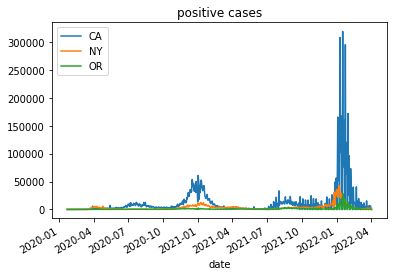

In [5]:
state1 = "CA"
state2 = "NY"
state3 = "OR"
#clean data, replace negatives with 1
x['new_case'][x['new_case'] < 1] = 1
ax = x[x['state'] == state1]['new_case'].plot()
x[x['state'] == state2]['new_case'].plot()
x[x['state'] == state3]['new_case'].plot()
ax.set_title("positive cases")
ax.legend([state1,state2,state3])

### A quick note about plot and axes
note the line above where i said `ax = x[x['state'] == state1]['new_case'].plot()`. Here I'm
grabbing the output of `plot()` and saving it in a variable called `ax` which stands in my mind for Axes. [Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) objects are the things that hold all the information about the aesthetics of a plot, like how x-tick marks are displayed, titles, legends, etc.. By way of example notice how lower down in the code cell I set the title and legend with the calls
```
ax.set_title("positive cases")
ax.legend([state1,state2,state3])
```

**Exercise:** Change the code block above to make a plot of the number of deaths in each population instead of the number of positive tests.
